# Predict geothermal heat flux: Ensemble Methods

References:
* https://scikit-learn.org/stable/modules/ensemble.html
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html
* https://github.com/amirkdv/ghf-greenland-gbrt

In [2]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn import preprocessing
import math
import matplotlib.pylab as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature

Load the data.

In [3]:
data_train = pd.read_csv('data/R17_global_train.csv')
X_train = data_train.drop(['lon', 'lat', 'GHF'], axis=1)
y_train = data_train[['GHF']].values.ravel()

labels = X_train.columns.values
num_features = len(labels)

data_test = pd.read_csv('data/R17_global_test.csv')
X_test = data_test.drop(['lon', 'lat', 'GHF'], axis=1)
y_test = data_test[['GHF']].values.ravel()

# Scale X
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('Num Features:', num_features)
print(labels)
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

Num Features: 17
['thickness_upper_crust' 'thickness_middle_crust'
 'upper_mantle_density_anomaly' 'd_2_ridge' 'd_2_trench' 'd_2_trans_ridge'
 'd_2_volcano' 'd_2_hotspot' 'thickness_crust' 'd_2_young_rift'
 'upper_mantle_vel_structure' 'age' 'magnetic_anomaly' 'depth_to_moho'
 'lithos_asthenos_bdry' 'bougeur_gravity_anomaly' 'topography']
X_train shape: (3227, 17)
y_train shape: (3227,)
X_test shape: (807, 17)
y_test shape: (807,)


In [4]:
def print_stats(name, estimator):
    print('Test R^2:', estimator.score(X_test, y_test))
    pred = estimator.predict(X_test)
    rmse = (1 / np.average(y_test)) * math.sqrt(np.average((y_test - pred)**2))
    print ('Test RMSE:', rmse)
    print()

    sort_i = np.argsort(estimator.feature_importances_)
    fig, ax = plt.subplots(figsize=(7,7))
    plt.title('Feature Importance (%s)' % name)
    plt.xlabel('Importance')
    plt.barh(labels[sort_i], estimator.feature_importances_[sort_i])
    plt.show()

### Random Forest

Test R^2: 0.7239718800402517
Test RMSE: 0.16381472960222995



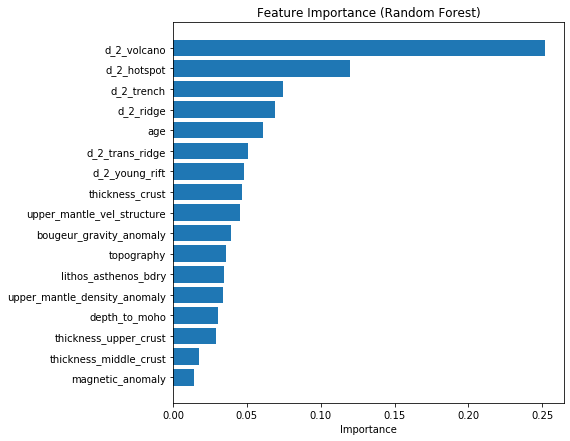

In [5]:
rf = RandomForestRegressor(n_estimators=100,
                           max_features='auto',
                           random_state=123456,
                           n_jobs=-1)
rf.fit(X_train, y_train)
print_stats('Random Forest', rf)

### Gradient Boosted Regression Trees (GBRT)

Test R^2: 0.7246158876772808
Test RMSE: 0.16362351802612346



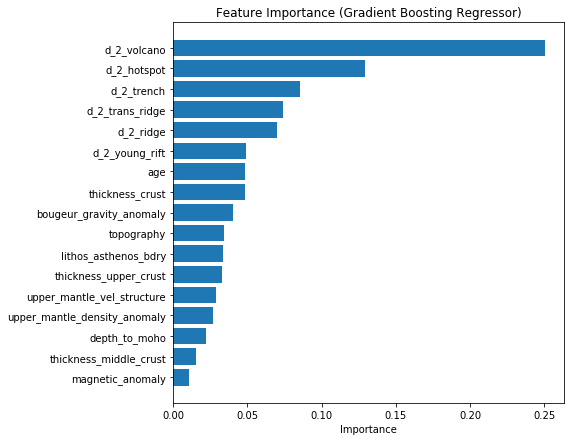

In [6]:
gbrt = GradientBoostingRegressor(n_estimators=2000,
                                 learning_rate=0.01,
                                 max_depth=9,
                                 loss='ls')
gbrt.fit(X_train, y_train)
print_stats('Gradient Boosting Regressor', gbrt)

### AdaBoost

Test R^2: 0.704578847853372
Test RMSE: 0.1694716584041783



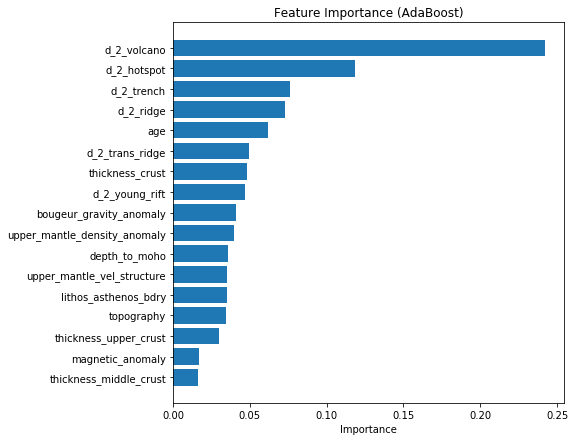

In [8]:
ada = AdaBoostRegressor(
    base_estimator=RandomForestRegressor(n_estimators=10, n_jobs=-1),
    n_estimators=100,
    learning_rate=.01,
    loss='square'
)
ada.fit(X_train, y_train)
print_stats('AdaBoost', ada)